# Explanation Generation Test

In [1]:
import os
import tqdm
from hydra.experimental import initialize, compose

with initialize(config_path="../experiment/config/"):
    cfg = compose("load.yaml")
print(cfg)

{'experiment_name': 'cartpole_ppo_train', 'env': 'cartpole', 'agents': {'seed': 1938, 'algorithm': 'ppo', 'policy': 'MlpPolicy', 'num_agents': 10, 'load_agent': True, 'save_agent': False, 'do_train': False, 'task_name': 'ppo_train', 'timesteps': 70000, 'save_freq': 10000, 'save_dir': '/home/joon/xai/causal/stable-baselines3/outputs/zero-train-ver-1213/cartpole_agents/', 'env_params': {'start_state_mode': 'gym_wrappers.StartStateMode.DESIGNATED_POSITIONS', 'start_states': [0.0]}}, 'collector_module': {'_target_': 'experiment.handlers.DataCollector', 'num_dims': 4, 'ranges': [[-2.4, 2.4], [-4.8, 4.8], [-0.209, 0.209], [-0.418, 0.418]], 'num_divides': 20, 'num_agents': 10, 'num_freq_saves': 7, 'collect_seed': 5868, 'total_trials': 50, 'env_params': {'start_state_mode': 'gym_wrappers.StartStateMode.DESIGNATED_POSITIONS', 'start_states': [0.0]}}, 'test_module': 'None'}


In [2]:
os.chdir('/home/joon/xai/causal/stable-baselines3')

from experiment.handlers import ExperimentHandler
a = ExperimentHandler(cfg)
data = a.run()


/home/joon/miniconda3/envs/icp/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/joon/miniconda3/envs/icp/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/joon/miniconda3/envs/icp/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/joon/miniconda3/envs/icp/lib/py

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 0


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 1


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 2


  2%|▏         | 1/50 [00:00<00:08,  5.80it/s]

agent # 3


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 4


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 5


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 6


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 7


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 8


  2%|▏         | 1/50 [00:00<00:09,  5.03it/s]

agent # 9


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


[6, 10, 10, 11]
[-1.0105263157894737, 0.0, -1.3877787807814457e-17, 0.043999999999999984]


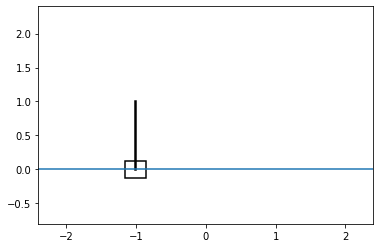

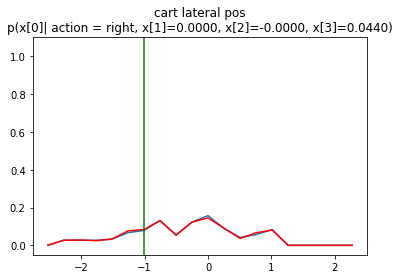

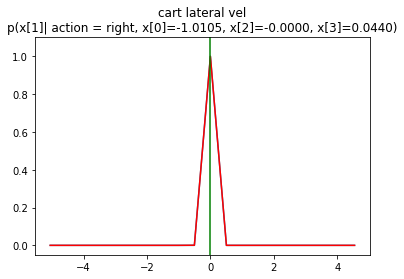

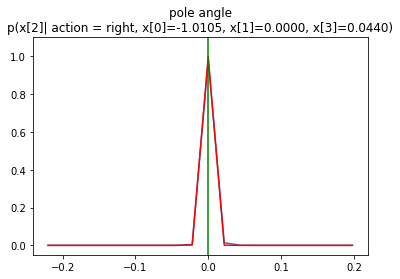

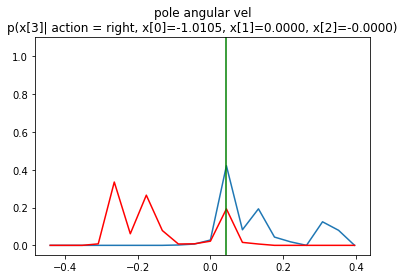

In [200]:
import numpy as np
avg = []
stderr = []

ranges = []
ranges += [np.linspace(-2.4, 2.4, 20)]
ranges += [np.linspace(-4.8, 4.8, 20)]
ranges += [np.linspace(-0.209, 0.209, 20)]
ranges += [np.linspace(-0.418, 0.418, 20)]

dp = [10, 10, 10, 10]
pd = np.sum(np.sum(data, axis=0), axis=0).flatten()
pd = pd / np.sum(pd)
pick = int(np.nonzero(np.random.multinomial(1, pd))[0])

dp = []

for i in range(4):
    dp = [pick % 20] + dp
    pick = pick // 20

print(dp)
real_dp = []
for i in range(4):
    real_dp += [(ranges[i][dp[i]-1] + ranges[i][dp[i]])/2]
print(real_dp)

for action in range(2):
    avg += [np.average(data[:, action, :, dp[1], dp[2], dp[3]], axis=0)]
    stderr += [np.sqrt(np.std(data[:, 0, :, dp[1], dp[2], dp[3]], axis=0)) / np.sqrt(10)]
    avg += [np.average(data[:, action, dp[0], :, dp[2], dp[3]], axis=0)]
    stderr += [np.sqrt(np.std(data[:, 0, dp[0], :, dp[2], dp[3]], axis=0)) / np.sqrt(10)]
    avg += [np.average(data[:, action, dp[0], dp[1], :, dp[3]], axis=0)]
    stderr += [np.sqrt(np.std(data[:, 0, dp[0], dp[1], :, dp[3]], axis=0)) / np.sqrt(10)]
    avg += [np.average(data[:, action, dp[0], dp[1], dp[2], :], axis=0)]
    stderr += [np.sqrt(np.std(data[:, 0, dp[0], dp[1], dp[2], :], axis=0)) / np.sqrt(10)]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

rad_90 = 3.14159265/2
fig,ax = plt.subplots(1)
rect = patches.Rectangle((real_dp[0]-0.15,-0.12),0.3,0.24,linewidth=1.5,edgecolor='black',facecolor='white')
ax.add_patch(rect)
ax.plot([real_dp[0], real_dp[0] + np.cos(real_dp[2] + rad_90)], [0, np.sin(real_dp[2] + rad_90)], color='black', linewidth=2.5)
ax.axhline(y=0)
ax.set_ylim([-0.8, 2.4])
ax.set_xlim([-2.4, 2.4])
plt.savefig("cart.png")
plt.show()


names = ['cart lateral pos', 'cart lateral vel', 'pole angle', 'pole angular vel']
for i in range(4):
    output_str = ""
    for j in range(4):
        if i != j:
            output_str += " x[{}]={:.4f},".format(j, real_dp[j])            
    output_str = output_str[:-1]
    plt.title(names[i] + "\n" + "p(x[{}]| action = right,{})".format(i, output_str))
    diff = (ranges[i][1] - ranges[i][0]) / 2
    if np.sum(avg[i]) == 0:
        plt.plot(ranges[i] - diff, avg[i])
    else:
        plt.plot(ranges[i] - diff, avg[i] / np.sum(avg[i]))
        #plt.fill_between(ranges[i] - diff, avg[i]/ np.sum(avg[i])-stderr[i]/ np.sum(avg[i]), avg[i]/ np.sum(avg[i])+stderr[i]/ np.sum(avg[i]), fc='b')
    if np.sum(avg[i+4]) == 0:
        plt.plot(ranges[i] - diff, avg[i+4])
    else:
        plt.plot(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4]), c='r')
        #plt.fill_between(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4])-stderr[i+4]/np.sum(avg[i+4]), avg[i+4]/np.sum(avg[i+4])+stderr[i+4]/np.sum(avg[i+4]), fc='r')
    
    plt.axvline(x=[ranges[i][dp[i]]-diff], c='g')
    plt.ylim([-0.05, 1.1])
    plt.savefig("result_{}.png".format(i))
    plt.show()



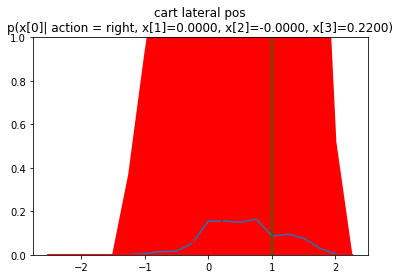

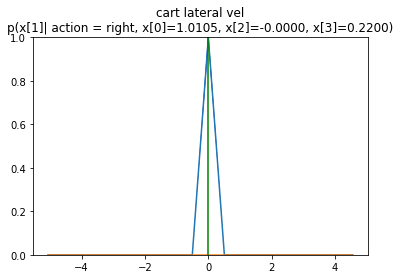

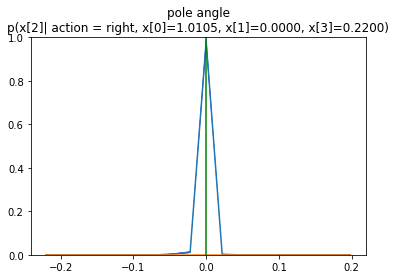

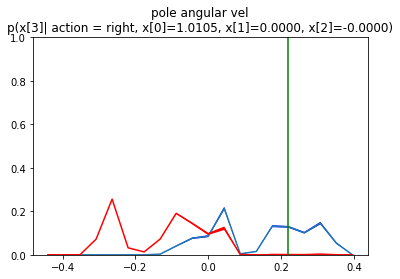

In [128]:

%matplotlib inline
import matplotlib.pyplot as plt
names = ['cart lateral pos', 'cart lateral vel', 'pole angle', 'pole angular vel']
for i in range(4):
    output_str = ""
    for j in range(4):
        if i != j:
            output_str += " x[{}]={:.4f},".format(j, real_dp[j])            
    output_str = output_str[:-1]
    plt.title(names[i] + "\n" + "p(x[{}]| action = right,{})".format(i, output_str))
    diff = (ranges[i][1] - ranges[i][0]) / 2
    if np.sum(avg[i]) == 0:
        plt.plot(ranges[i] - diff, avg[i])
    else:
        plt.plot(ranges[i] - diff, avg[i] / np.sum(avg[i]))
        plt.fill_between(ranges[i] - diff, avg[i]/ np.sum(avg[i])-stderr[i]/ np.sum(avg[i]), avg[i]/ np.sum(avg[i])+stderr[i]/ np.sum(avg[i]), fc='b')
    if np.sum(avg[i+4]) == 0:
        plt.plot(ranges[i] - diff, avg[i+4])
    else:
        plt.plot(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4]), c='r')
        plt.fill_between(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4])-stderr[i+4]/np.sum(avg[i+4]), avg[i+4]/np.sum(avg[i+4])+stderr[i+4]/np.sum(avg[i+4]), fc='r')
    
    plt.axvline(x=[ranges[i][dp[i]]-diff], c='g')
    plt.ylim([0, 1.0])
    plt.show()
